In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
import pyrotd
#import meshio
import pandas as pd
from matplotlib.lines import Line2D

In [2]:
SF3_files = glob.glob("*_SF3y.csv")
Ax_files = glob.glob("*_Ax.csv")
IS_Nodes = [22,21,20,19,18,17,15,16]
IC_Nodes = [34,33,32,31,30,29,28,27,26,25,23,24]
IS_Elem = [72,71,70,69,68,67,66]
IC_Elem = [83,82,81,80,79,78,77,76,75,74,73]

In [3]:
SF3 = {}
for file in SF3_files:
    SF3[file] = {}
    with open(file,'r') as f:
        for line in f:
            data = line.strip().split(',')
            SF3[file][int(data[0])] = np.array([float(val) for val in data[1:]])
AX = {}
for file in Ax_files:
    AX[file] = {}
    with open(file,'r') as f:
        for line in f:
            data = line.strip().split(',')
            AX[file][int(data[0])] = np.array([float(val) for val in data[1:]])
#open(SF3_files[0],'r').readline()

In [4]:
nodes = pd.read_csv('nodes.csv', index_col='NODE')
b31 = pd.read_csv('b31.csv',index_col='Eid')

In [5]:
ic_loc = {}
for el in IC_Elem:
    bn = b31.iloc[:,0][el]
    fn = b31.iloc[:,1][el]
    ic_loc[el] = [nodes.iloc[:,2][bn],nodes.iloc[:,2][fn]]
#    print(el)

In [6]:
is_loc = {}
for el in IS_Elem:
    bn = b31.iloc[:,0][el]
    fn = b31.iloc[:,1][el]
    is_loc[el] = [nodes.iloc[:,2][bn],nodes.iloc[:,2][fn]]
#    print(el)

In [7]:
SF3_files

['RSN164_SF3y.csv',
 'RSN4013_SF3y.csv',
 'RSN4841_SF3y.csv',
 'RSN4843_SF3y.csv',
 'RSN57_SF3y.csv',
 'RSN70_SF3y.csv',
 'RSN830_SF3y.csv',
 'RSN88_SF3y.csv',
 'SpecComp_neHDD_SF3y.csv']

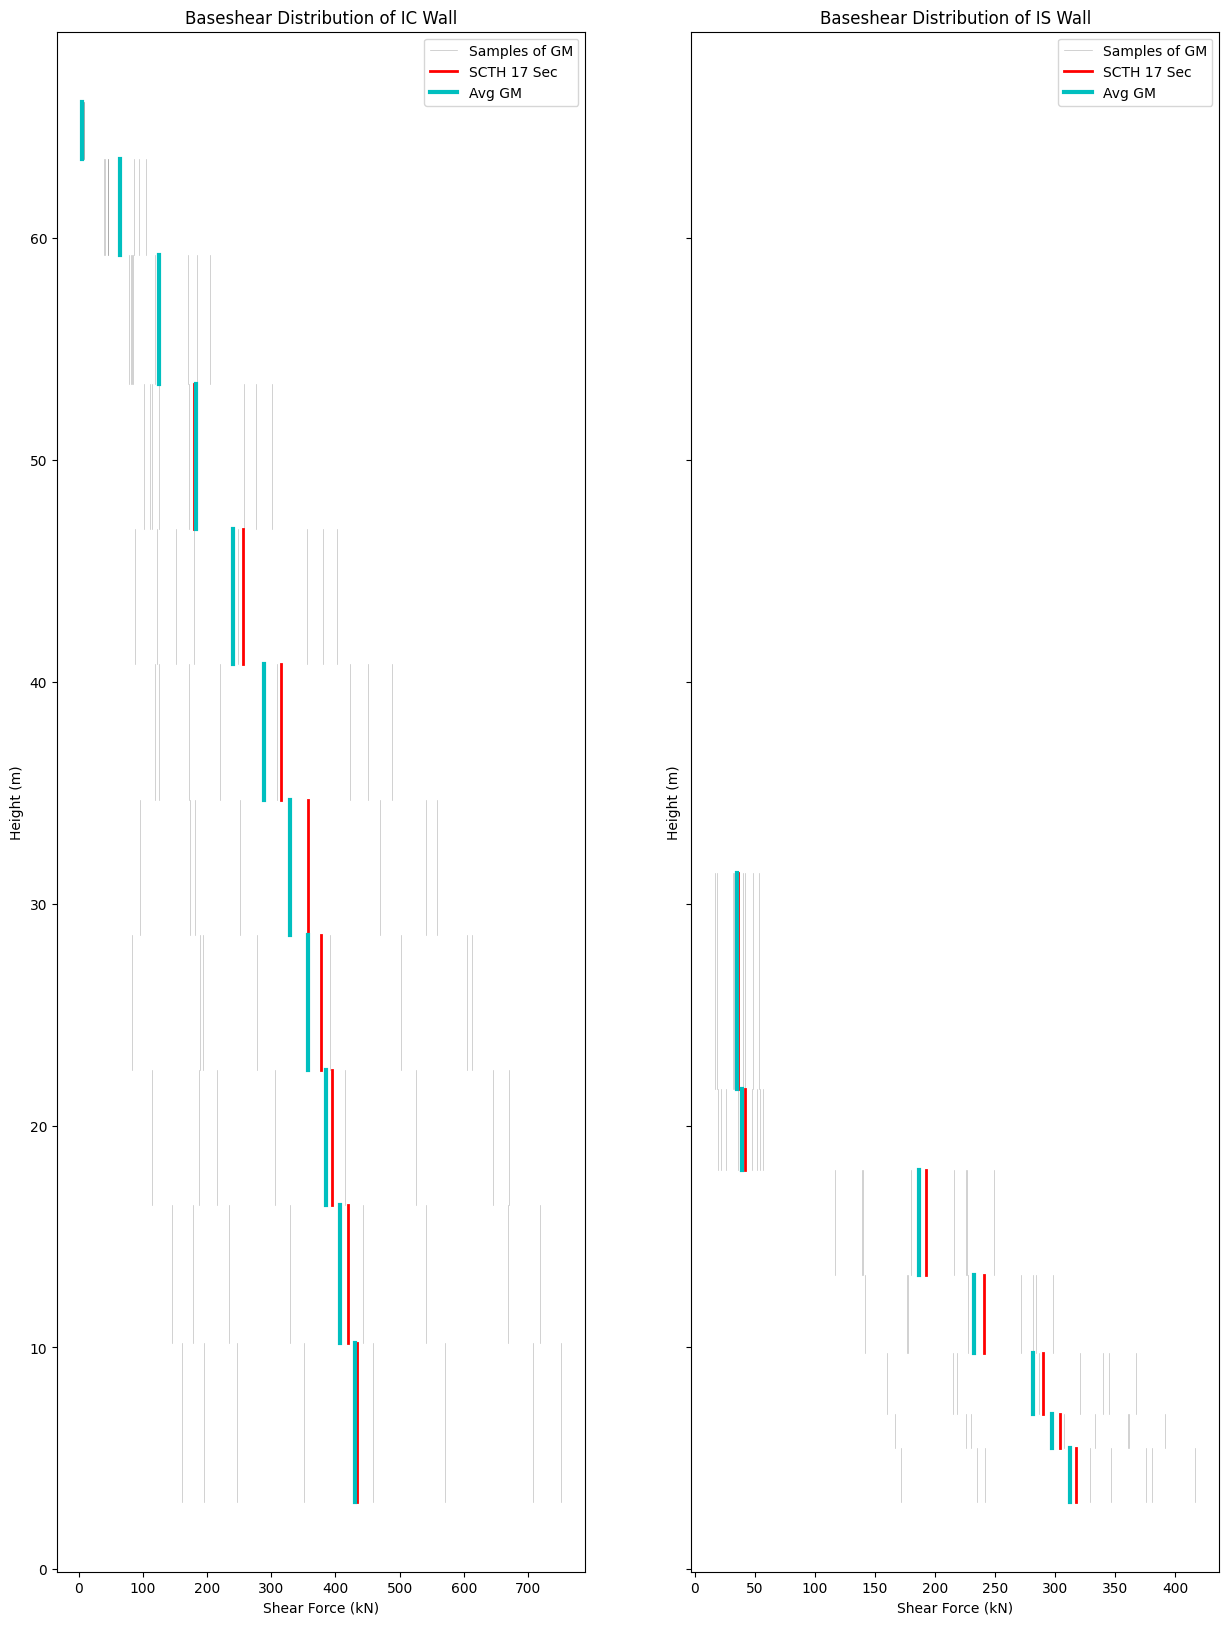

In [8]:
fig, axs = plt.subplots(1,2,figsize=(15,20),sharey=True)
avg = {}
for f,val in SF3.items():
    if 'neHDD' in f:
        color = 'r'
        alp = 1.0
        lw = 2
        avg_check = False
    elif '27sec' in f:
        color = 'b'
        alp = 1.0
        lw = 2
        avg_check = False
    elif '50sec' in f:
        color = 'g'
        alp = 1.0
        lw = 2
        avg_check = False
    else:
        color = 'k'
        alp = 0.25
        lw = 0.5
        avg_check = True
    for eid, th in val.items():
        if eid == 0:
            continue
        if not(eid in avg.keys()):
            avg[eid] = 0.0
        if eid in IC_Elem:
            axid = 0
            yaxis = ic_loc[eid]
        else:
            axid = 1
            yaxis = is_loc[eid]
        maxm = np.max(np.abs(th))/1000
        if avg_check:
            avg[eid] = avg[eid] + maxm/8
        axs[axid].plot([maxm,maxm],yaxis, c=color, alpha=alp,lw=lw)
for eid,val in avg.items():
    if eid in IC_Elem:
        axid = 0
        yaxis = ic_loc[eid]
    else:
        axid = 1
        yaxis = is_loc[eid]
    axs[axid].plot([val,val],yaxis, c='c',lw=3, label='Avg of Grd. Motions')
custom_lines = [Line2D([0], [0], color='k', alpha=0.25, lw=0.5),\
                Line2D([0], [0], color='r', alpha=1, lw=2),\
               Line2D([0], [0], color='c', alpha=1, lw=3)]


#axs[0].grid(both=True, which='both', color='0.65', linestyle='-')
axs[0].set_title('Baseshear Distribution of IC Wall')
axs[0].set_xlabel('Shear Force (kN)')
axs[0].set_ylabel('Height (m)')
#axs[1].grid(b=True, which='both', color='0.65', linestyle='-')
axs[1].set_title('Baseshear Distribution of IS Wall')
axs[1].set_xlabel('Shear Force (kN)')
axs[1].set_ylabel('Height (m)')
axs[0].legend(custom_lines, ['Samples of GM',\
                             'SCTH 17 Sec', 'Avg GM'])
axs[1].legend(custom_lines, ['Samples of GM',\
                             'SCTH 17 Sec', 'Avg GM'])
plt.savefig('comparison_of_base_shear_y.png', dpi=400)

# Comparison of Floor Response Spectra

In [9]:
plt.scatter(freq,freq)

NameError: name 'freq' is not defined

In [ ]:
val